In [1]:
from notebook_helpers import *

In [2]:
project_directory = Path("/home/ediun/git/histalign/projects/project_310724_full")
project_path = Path(
    "/home/ediun/git/histalign/projects/project_310724_full/project.json"
)
alignment_path = Path(
    "/home/ediun/git/histalign/projects/project_310724_full/7d9af388b0/afd5b2648a01ba566e345a2acb10b4fb.json"
)
atlas_path = Path("/home/ediun/.local/share/histalign/atlases/average_template_25.nrrd")

In [3]:
alignment_settings = load_alignment_settings(alignment_path)

In [4]:
atlas_slicer = VolumeSlicer(
    path=atlas_path,
    resolution=alignment_settings.volume_settings.resolution,
    lazy=False,
)
atlas_volume_array = atlas_slicer.volume._volume.tonumpy()
plane_mesh = atlas_slicer.slice(alignment_settings.volume_settings, return_mesh=True)

In [5]:
histology_slice = load_image(alignment_settings.histology_path)

registrator = Registrator(True, True)
registered_histology_slice = registrator.get_forwarded_image(
    histology_slice, alignment_settings
)

flattened_registered_histology_slice = registered_histology_slice.flatten()

In [6]:
plane_mesh.pointdata["ImageScalars"] = flattened_registered_histology_slice

In [10]:
plane_volume = vedo.Volume(np.zeros_like(atlas_volume_array))
plane_volume.cmap(
    "blue", alpha=[0, 1], vmin=0, vmax=np.iinfo(histology_slice.dtype).max
)
_ = plane_volume.interpolate_data_from(plane_mesh, radius=1)


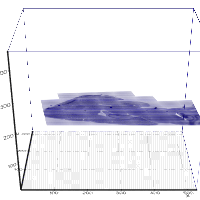

In [12]:
temp_array = plane_volume.tonumpy()
draw_array_skeleton(temp_array, value=temp_array.max())
plane_volume.modified()

In [13]:
show([plane_volume])